
<img src="../../images/brownbear.png" width="400">

## A financial tool that can analyze and maximize investment portfolios on a risk adjusted basis  


Description: This notebook is useful for examining potfolios comprised of investments options from the dow30 and alabama.  Construct portfolios from the Investment Options in the dow30+alabama and examine the results of different weighting schemes.


In [1]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [2]:
# imports
import pandas as pd
import matplotlib.pyplot as plt
import brownbear as bb

# format price data
pd.options.display.float_format = '{:0.2f}'.format

# display all rows
pd.set_option('display.max_rows', None)

# do not truncate column names
pd.set_option('display.max_colwidth', None)

%matplotlib inline

In [3]:
# set size of inline plots
'''note: rcParams can't be in same cell as import matplotlib
   or %matplotlib inline
   
   %matplotlib notebook: will lead to interactive plots embedded within
   the notebook, you can zoom and resize the figure
   
   %matplotlib inline: only draw static images in the notebook
'''
plt.rcParams["figure.figsize"] = (10, 7)

### Some Globals

In [4]:
investment_universe = ['alabama-galaxy']

In [5]:
# Fetch Investment Options - all values annualized
df = bb.fetch(investment_universe, risk_free_rate=0, annual_returns='5 Yr', standard_deviation='SD 3 Yr')
df

,Investment Option,Description,Asset Class,1 mo,3 mo,1 Yr,3 Yr,5 Yr,Vola,DS Vola,SD 1 Yr,SD 3 Yr,SD 5 Yr,Annual Returns,Std Dev,Sharpe Ratio
0,ROAD,Construction Partners Inc,US Stocks:Industrials,-75.93,-70.04,40.05,39.48,36.65,42.67,25.87,42.98,37.25,34.61,36.65,37.25,0.98
1,EHC,Encompass Health,US Stocks:Healthcare,-22.40,-18.78,25.64,21.83,12.39,23.02,13.93,16.81,26.38,29.68,12.39,26.38,0.47
2,RF,Regions Financial,US Stocks:Financials,-70.68,-46.55,15.62,3.10,18.03,24.69,17.30,27.02,32.66,31.56,18.03,32.66,0.55
3,VMC,Vulcan Materials Company,US Stocks:Materials,-78.79,-50.44,-13.54,10.29,14.46,33.37,24.74,25.68,27.66,25.18,14.46,27.66,0.52
4,ADTN,ADTRAN,US Stocks:Technology,-90.37,27.72,54.50,-21.80,6.18,57.67,44.13,65.19,63.36,55.94,6.18,63.36,0.10
5,PRA,ProAssurance Corporation,US Stocks:Financials,157.34,-21.31,31.91,-14.01,-6.34,56.58,16.52,26.24,39.06,41.91,-6.34,39.06,-247.64


In [6]:
# rank
rank = bb.rank(df, rank_by='Sharpe Ratio')
rank_filtered = rank
#rank_filtered = rank.loc[(rank['3 mo'] > 0) & rank['1 Yr'] > 0]
rank_filtered

,Investment Option,Description,Asset Class,1 mo,3 mo,1 Yr,3 Yr,5 Yr,Vola,DS Vola,SD 1 Yr,SD 3 Yr,SD 5 Yr,Annual Returns,Std Dev,Sharpe Ratio
0,ROAD,Construction Partners Inc,US Stocks:Industrials,-75.93,-70.04,40.05,39.48,36.65,42.67,25.87,42.98,37.25,34.61,36.65,37.25,0.98
2,RF,Regions Financial,US Stocks:Financials,-70.68,-46.55,15.62,3.10,18.03,24.69,17.30,27.02,32.66,31.56,18.03,32.66,0.55
3,VMC,Vulcan Materials Company,US Stocks:Materials,-78.79,-50.44,-13.54,10.29,14.46,33.37,24.74,25.68,27.66,25.18,14.46,27.66,0.52
1,EHC,Encompass Health,US Stocks:Healthcare,-22.40,-18.78,25.64,21.83,12.39,23.02,13.93,16.81,26.38,29.68,12.39,26.38,0.47
4,ADTN,ADTRAN,US Stocks:Technology,-90.37,27.72,54.50,-21.80,6.18,57.67,44.13,65.19,63.36,55.94,6.18,63.36,0.10
5,PRA,ProAssurance Corporation,US Stocks:Financials,157.34,-21.31,31.91,-14.01,-6.34,56.58,16.52,26.24,39.06,41.91,-6.34,39.06,-247.64


### Sample Portfolios
Format 'Investment option': weight

In [7]:
# everything ranked
ranked_portfolio = {
    'Title': 'Ranked Portfolio'
}
everything = list(rank_filtered['Investment Option'])[:20]
ranked_portfolio.update(dict.fromkeys(everything, 1/len(everything)))

# top 10
top10_portfolio = {
    'Title': 'Top10 Portfolio'
}
top10 = list(rank['Investment Option'])[:10]
top10_portfolio.update(dict.fromkeys(top10, 1/len(top10)))

### Custom Portfolios

In [8]:
# My portfolio
my_portfolio = {
    'Title': 'My Portfolio',

}

### Choose Portfolio Option

In [9]:
# Select one of the portfolios from above
portfolio_option = ranked_portfolio

In [10]:
# Make a copy so that the original portfolio is preserved
portfolio_option = portfolio_option.copy()
portfolio_option

{'Title': 'Ranked Portfolio',
 'ROAD': 0.16666666666666666,
 'RF': 0.16666666666666666,
 'VMC': 0.16666666666666666,
 'EHC': 0.16666666666666666,
 'ADTN': 0.16666666666666666,
 'PRA': 0.16666666666666666}

### Analysis Options

In [11]:
# Specify the weighting scheme.  It will replace the weights specified in the portfolio
# You can also fix the weights on some Investent Options, Asset Classes, and Asset Subclasses
# while the others are automatically calculated.

# 'Equal' - will use equal weights.

# 'Sharpe Ratio' - will use proportionally weighted # allocations based on the percent
#  of an investment option's sharpe ratio to the sum of all the sharpe ratios in the portfolio.

# 'Std Dev' - will use standard deviation adjusted weights

# 'Annual Returns' - will use return adjusted weights

# 'Vola' - will use volatility adjusted weights

# 'DS Vola' - will use downside volatility adjusted weights

# None: 'Investment Option' means use user specified weights
#       'Asset Class' means do not group by Asset Class
#       'Asset Subclass means do not group by Asset Subclass 

weight_by = {
    'Asset Class':       {'weight_by': None},
    'Asset Subclass':    {'weight_by': 'Sharpe Ratio'},
    'Investment Option': {'weight_by': 'Equal'},
}
#weight_by = None

In [12]:
bb.DEBUG = False

# Analyze portfolio
annual_ret, std_dev, sharpe_ratio = \
    bb.analyze(df, portfolio_option, weight_by)

,ROAD,RF,VMC,EHC,ADTN,PRA,Ranked Portfolio
Annual Returns,36.65,18.03,14.46,12.39,6.18,-6.34,14.72
Std Dev,37.25,32.66,27.66,26.38,63.36,39.06,31.78
Sharpe Ratio,0.98,0.55,0.52,0.47,0.10,-247.64,0.46
Weight,0.20,0.10,0.16,0.20,0.23,0.10,1.00
Worst Typical Down Year,-37.85,-47.29,-40.86,-40.37,-120.54,-84.46,-48.85
Black Swan,-75.10,-79.95,-68.52,-66.75,-183.90,-123.52,-80.64


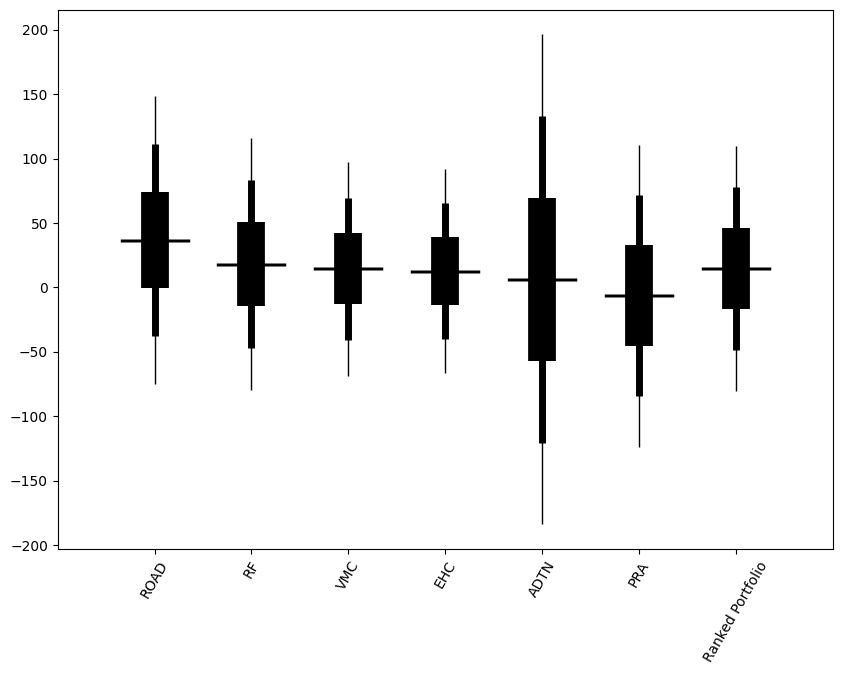

In [13]:
# Display Results
summary = bb.summary(df, portfolio_option, annual_ret, std_dev, sharpe_ratio)
summary

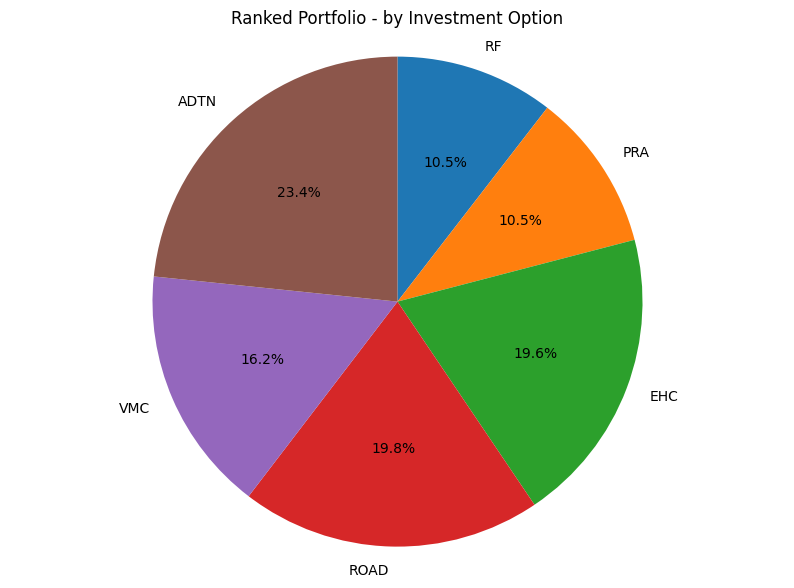

RF     0.10
PRA    0.10
EHC    0.20
ROAD   0.20
VMC    0.16
ADTN   0.23



In [14]:
# Show pie charts of investment and asset class weights
bb.show_pie_charts(df, portfolio_option, charts=['Investment Option'])

In [15]:
# Show exact weights
bb.print_portfolio(portfolio_option)

Ranked Portfolio Weights:
    ROAD                           0.1983
    RF                             0.1047
    VMC                            0.1625
    EHC                            0.1962
    ADTN                           0.2336
    PRA                            0.1047


### Optimize Portfolio

In [16]:
# Run_portfolio_optimizer = True will run portfolio optimizer after portfolio analysis is complete
run_portfolio_optimizer = True

In [17]:
# Optimize sharpe ratio while specifying Annual Rate, Worst Typical Down Year,
# and Black Swan.  Setting a constraint to None optimizes absolute Sharpe Ratio
# without regard to that constraint.

'''
constraints = {
    'Annual Return': 12,
    'Worst Typical Down Year': -5,
    'Black Swan': -20
}
'''

constraints = {
    'Annual Return': 8,
    'Worst Typical Down Year': None,
    'Black Swan': -40
}

if run_portfolio_optimizer:
    bb.optimizer(df, portfolio_option, constraints)

Running optimizer

Impossible criteria specified, lower your expectations!!!


### Use Sharpe Ratio adjusted weights
Recommend that you also try using Sharpe Ratio adjusted weights and compare those results with the Optimized Portflio.  
It tends to produce a higher Annual Return while keeping the allocations more balanced than the Optimizer.  (See 'Analysis Options' section).